# Module Title:	Strategic Thinking
### Assessment Title: Strategic Thinking Project
### Lecturer Name: James Garza
### Student Full Name & Number:	Ayllin Bukovic 2023003| Heitor Gomes de Araújo Filho 2023098 | Leandro Boniek Costa Calixto 2023102

# Table of Contents

## EDA

The dataset spg.csv can be found on Kaggle, an authentic resource repository, and has 4981 observations and 11 attributes.

In [168]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd

#for visualistions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(palette='Paired')

#for data preprocessing and preperation 
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold

#for defining models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#for model evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore")

In [169]:
# loading the data into dataframe.
df = pd.read_csv('brain_stroke.csv')

In [170]:
df = df.rename(columns={"gender": "Gender", "age": "Age", "hypertension": "Hypertension", "heart_disease": "Heart Disease", "ever_married": "Civil Status","work_type": "Type of work", "Residence_type": "Residence", "avg_glucose_level": "Glucose Level", "bmi": "Body Mass Index", "smoking_status": "Smoking", "stroke": "Stroke" })

In [171]:
#create data dictionary including variable name and data types
data_dict = pd.DataFrame({'Variable': df.columns, 'Data Type': [df[col].dtype for col in df.columns]})

#write variable descriptions
data_dict['Description'] = [
    'Gender of patient\nFemale, Male', 
    'Age of patient (years)', 
    '0 = does not have hypertention\n1 = has hypertension',
    '0 = does not have hear disease\n1 = has heart disease',
    'Marriage History\nYes(been or is married)\nNo(never married)',
    'Type of Work-\nPrivate: work for private firm\nSelf-employed\nGovt_job: work for government\nchildren: is a child (no work)',
    'Type of Residence Area\nUrban, Rural',
    'Average Glucose Level of patient (mg/dL)',
    'Body Mass Index',
    'Smoking Status of patient\nSmokes, Unknown, Former Smoker, Never Smoked',
    'Stroke History\n0 = has not had a stroke\n1 = has had a stroke'
]

#increase column width so that all texts show
data_dict = data_dict.style.set_properties(subset=['Description'], **{'width': '600px'}) 
data_dict #display dataframe

,Variable,Data Type,Description
0,Gender,object,"Gender of patient Female, Male"
1,Age,float64,Age of patient (years)
2,Hypertension,int64,0 = does not have hypertention 1 = has hypertension
3,Heart Disease,int64,0 = does not have hear disease 1 = has heart disease
4,Civil Status,object,Marriage History Yes(been or is married) No(never married)
5,Type of work,object,Type of Work- Private: work for private firm Self-employed Govt_job: work for government children: is a child (no work)
6,Residence,object,"Type of Residence Area Urban, Rural"
7,Glucose Level,float64,Average Glucose Level of patient (mg/dL)
8,Body Mass Index,float64,Body Mass Index
9,Smoking,object,"Smoking Status of patient Smokes, Unknown, Former Smoker, Never Smoked"


In [172]:
df.head()

,Gender,Age,Hypertension,Heart Disease,Civil Status,Type of work,Residence,Glucose Level,Body Mass Index,Smoking,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [173]:
df.shape
print('The dataset original shape: ', df.shape) 

The dataset original shape:  (4981, 11)


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4981 non-null   object 
 1   Age              4981 non-null   float64
 2   Hypertension     4981 non-null   int64  
 3   Heart Disease    4981 non-null   int64  
 4   Civil Status     4981 non-null   object 
 5   Type of work     4981 non-null   object 
 6   Residence        4981 non-null   object 
 7   Glucose Level    4981 non-null   float64
 8   Body Mass Index  4981 non-null   float64
 9   Smoking          4981 non-null   object 
 10  Stroke           4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [175]:
df.isna().sum()

Gender             0
Age                0
Hypertension       0
Heart Disease      0
Civil Status       0
Type of work       0
Residence          0
Glucose Level      0
Body Mass Index    0
Smoking            0
Stroke             0
dtype: int64

In [176]:
df.duplicated().sum()

0

In [177]:
df.describe()

,Age,Hypertension,Heart Disease,Glucose Level,Body Mass Index,Stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [178]:
df.describe(include=['object'])

,Gender,Civil Status,Type of work,Residence,Smoking
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


In [179]:
#make list of all numerical columns
num_cols = df.select_dtypes(include ='float').keys()
num_cols

Index(['Age', 'Glucose Level', 'Body Mass Index'], dtype='object')

In [180]:
#make list of categorical columns with the object datatype
cat_cols_object = df.select_dtypes(include ='object' or 'int64').keys()
cat_cols_object

Index(['Gender', 'Civil Status', 'Type of work', 'Residence', 'Smoking'], dtype='object')

In [181]:
#make list of categorical columns with the integer datatype
cat_cols_binary = df.select_dtypes(include = 'int64').keys()
cat_cols_binary

Index(['Hypertension', 'Heart Disease', 'Stroke'], dtype='object')

In [182]:
#make list of all categorical columns
cat_variables = cat_cols_object.append(cat_cols_binary)
cat_variables

Index(['Gender', 'Civil Status', 'Type of work', 'Residence', 'Smoking',
       'Hypertension', 'Heart Disease', 'Stroke'],
      dtype='object')

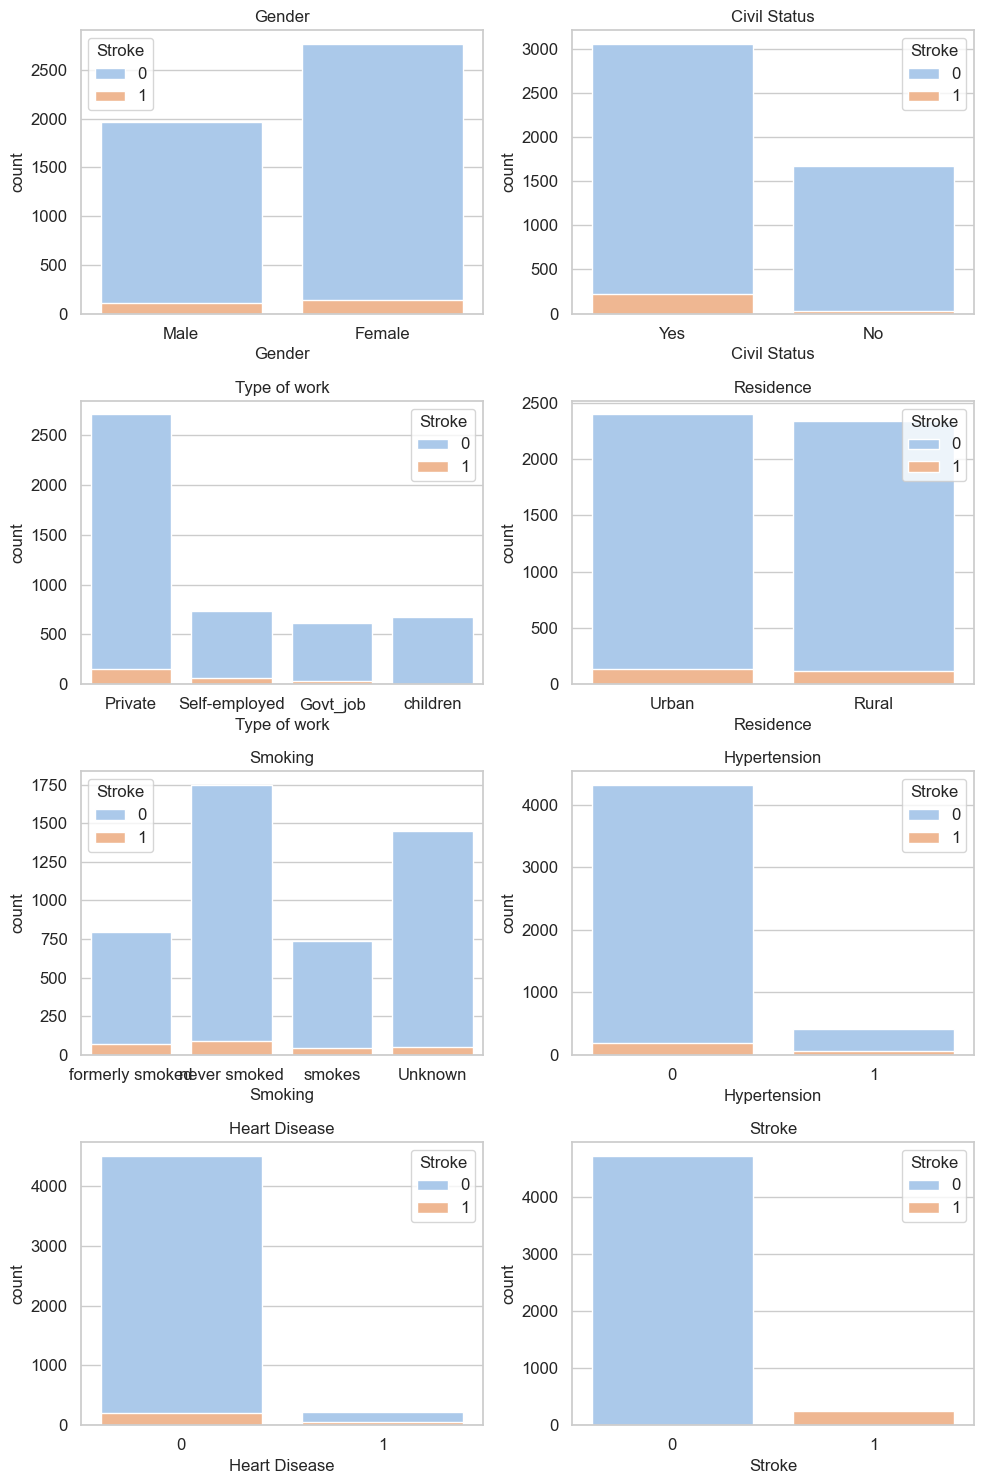

In [183]:
# Define the font size
font_size = 12

# Define the 'Icefire' color palette
custom_palette = sns.color_palette("pastel")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each categorical column of the dataframe, creating a subplot
for i, col in enumerate(df[cat_variables]):
    sns.countplot(x=col, hue='Stroke', data=df, ax=axes[i], dodge=False, palette=custom_palette)

    # Set the title and font size
    axes[i].set_title(col, fontsize=font_size)

    # Set the label font size for the x and y axis
    axes[i].tick_params(axis='x', labelsize=font_size)
    axes[i].tick_params(axis='y', labelsize=font_size)

    # Set the legend font size
    legend = axes[i].get_legend()
    for text in legend.get_texts():
        text.set_fontsize(font_size)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

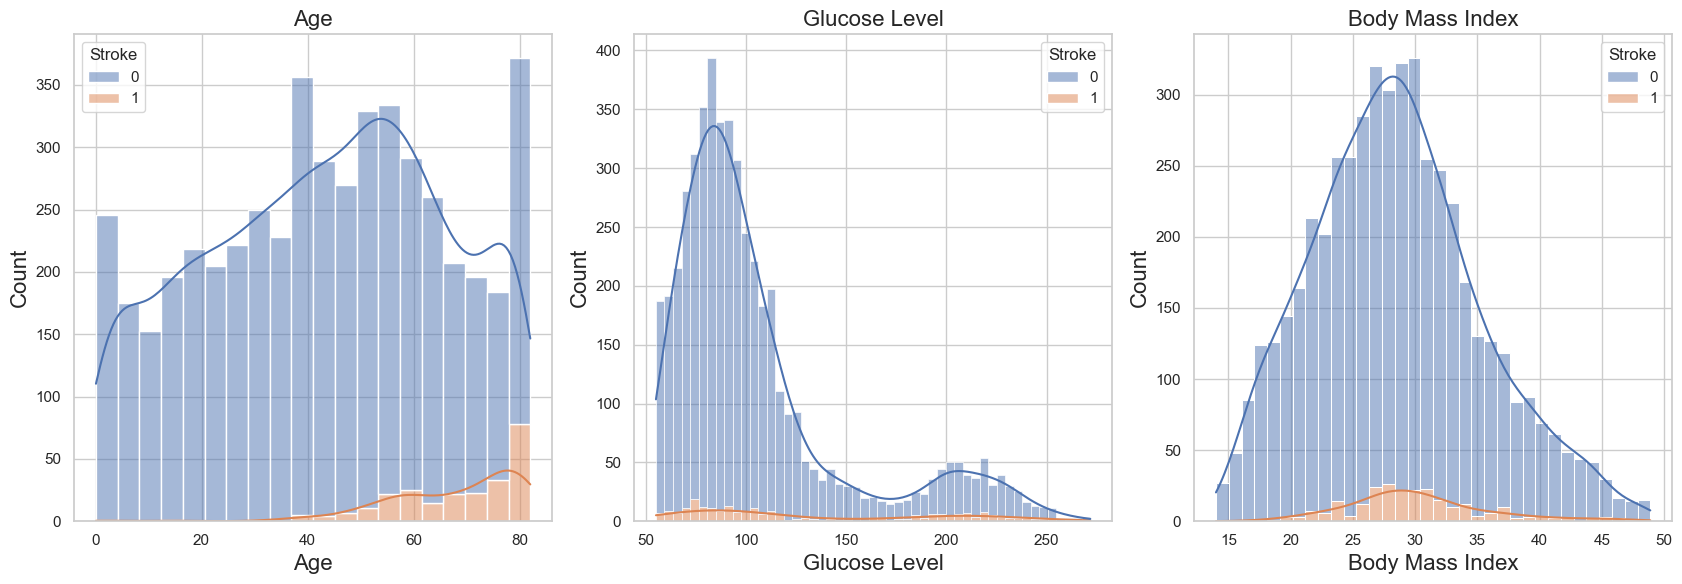

In [184]:
# Define the color palette as 'icefire'
sns.set_palette("pastel")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 6))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.histplot(x=col, hue='Stroke', data=df, ax=axes[i], kde=True, multiple='stack')
    axes[i].set_title(col, fontsize=16)  

    # Set the label font size for the x and y axis
    axes[i].set_xlabel(col, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

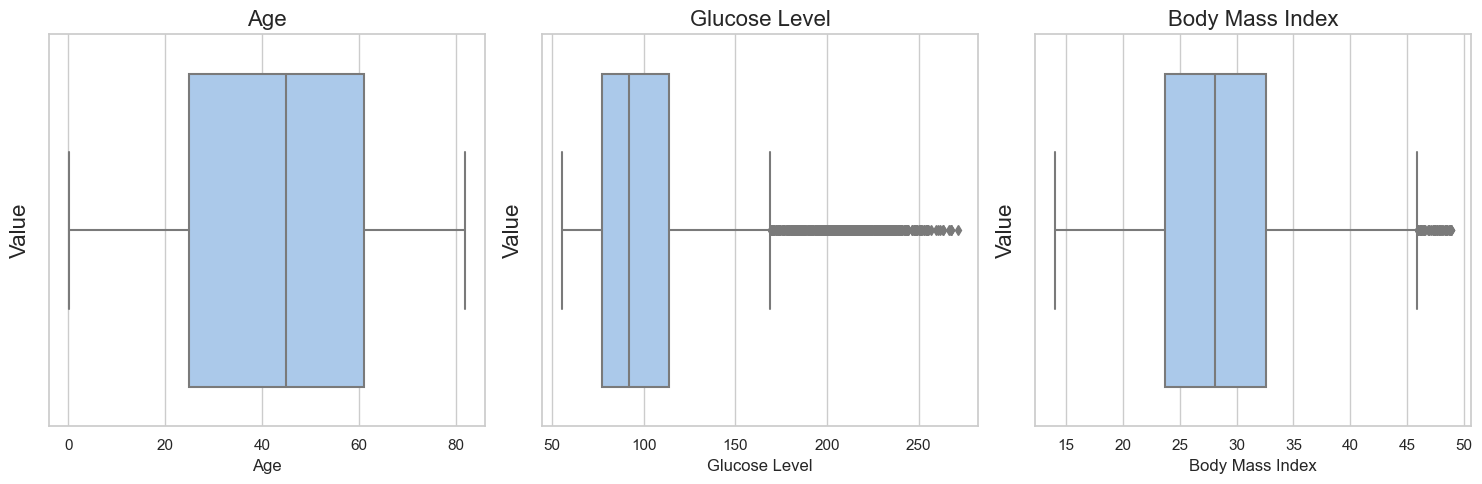

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.boxplot(x=col, data=df, ax=axes[i], palette=sns.color_palette('pastel'))

    # Set the title and font size
    axes[i].set_title(col, fontsize=16)

    # Set the label font size for the y-axis
    axes[i].set_ylabel('Value', fontsize=16)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

In [186]:
def check_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR)))]
    return outliers

# Print the number of the outliers in the 3 cols:
for i in range(0, len(num_cols)):
    print(f'The number of the outliers of the {num_cols[i]} column is : {len(check_outliers(df[num_cols[i]]))}')

The number of the outliers of the Age column is : 0
The number of the outliers of the Glucose Level column is : 602
The number of the outliers of the Body Mass Index column is : 43


In [187]:
df_skew = df.skew(axis=0) 
df_skew.sort_values(ascending=False) 

Stroke             4.140942
Heart Disease      3.896191
Hypertension       2.740377
Glucose Level      1.587526
Body Mass Index    0.371553
Age               -0.144001
dtype: float64

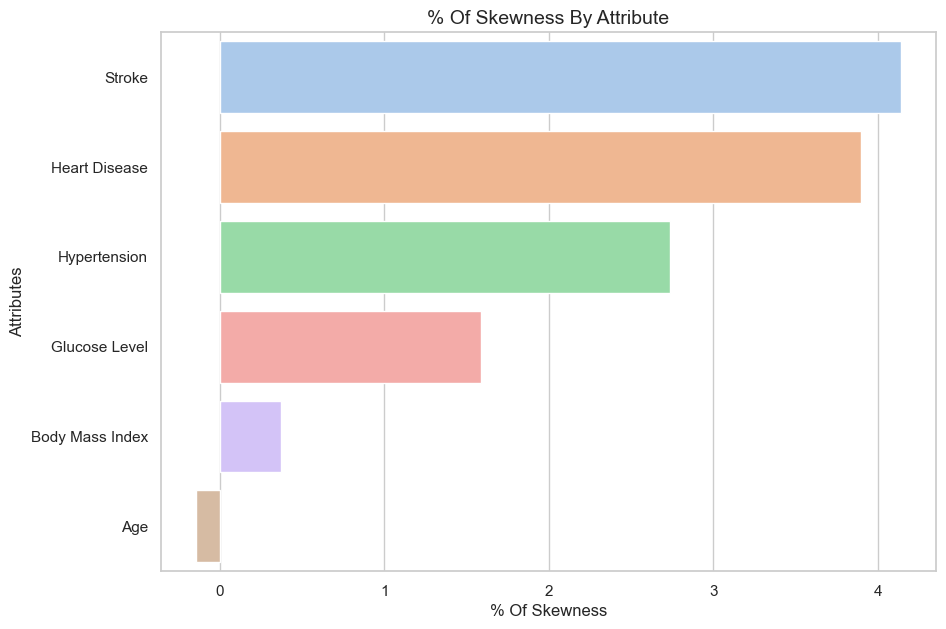

In [188]:
# Define the 'Icefire' color palette
sns.set_palette("pastel")

# Sort the skew values in descending order
df_skew_sorted = df_skew.sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=df_skew_sorted.values, y=df_skew_sorted.index, orient="h")

# Customize the plot
plt.title("% Of Skewness By Attribute", fontsize=14)
plt.xlabel("% Of Skewness", fontsize=12)
plt.ylabel("Attributes", fontsize=12)

# Rotate the y-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

## Data Preprocessing

In [189]:
l1=LabelEncoder()
df["Gender"]=l1.fit_transform(df["Gender"])
df["Civil Status"]=l1.fit_transform(df["Civil Status"])
df["Type of work"]=l1.fit_transform(df["Type of work"])
df["Residence"]=l1.fit_transform(df["Residence"])
df["Smoking"]=l1.fit_transform(df["Smoking"])

In [190]:
df.head()

,Gender,Age,Hypertension,Heart Disease,Civil Status,Type of work,Residence,Glucose Level,Body Mass Index,Smoking,Stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4981 non-null   int32  
 1   Age              4981 non-null   float64
 2   Hypertension     4981 non-null   int64  
 3   Heart Disease    4981 non-null   int64  
 4   Civil Status     4981 non-null   int32  
 5   Type of work     4981 non-null   int32  
 6   Residence        4981 non-null   int32  
 7   Glucose Level    4981 non-null   float64
 8   Body Mass Index  4981 non-null   float64
 9   Smoking          4981 non-null   int32  
 10  Stroke           4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB


## Correlation among variables

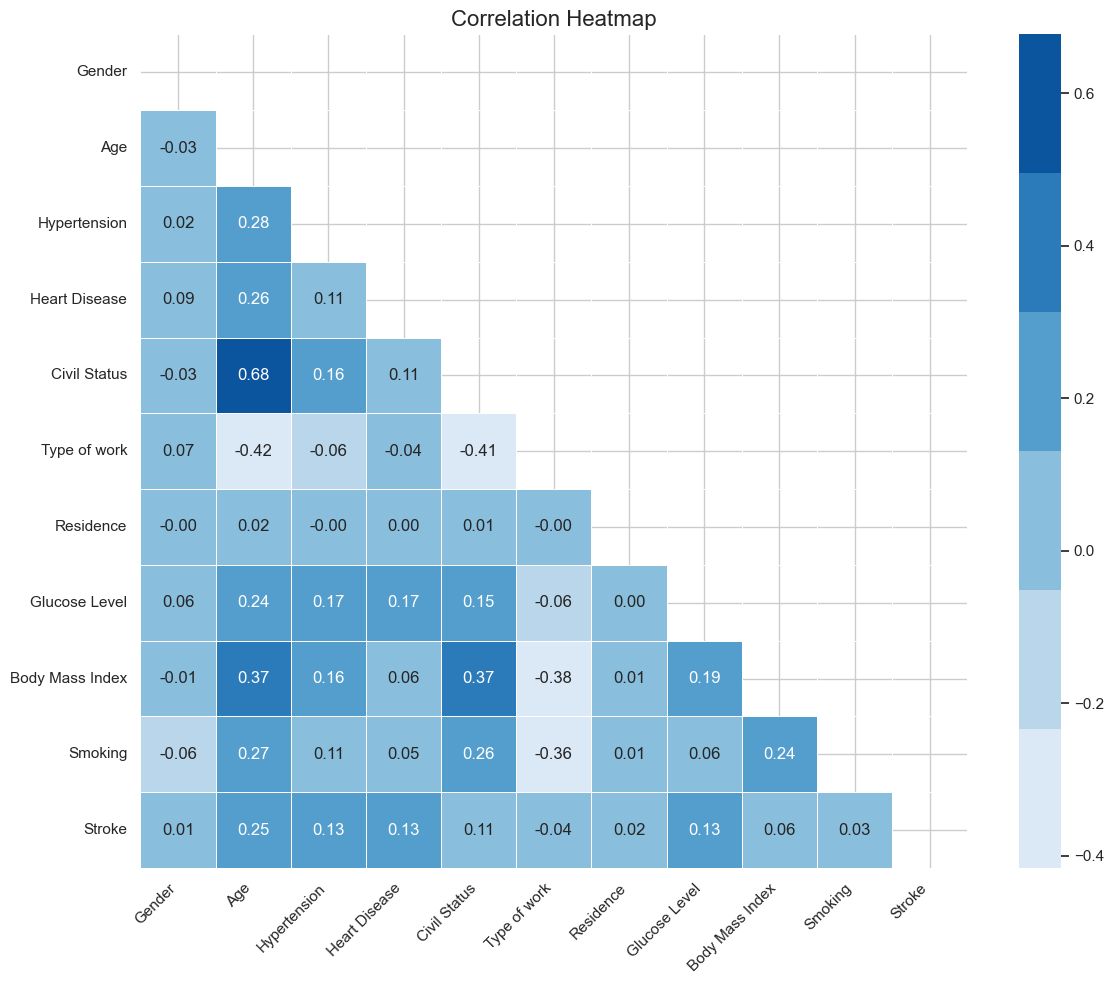

In [192]:
# Set the figure size and create a correlation matrix
plt.figure(figsize=(12, 10))
corr_table = df.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_table, dtype=bool))

# Define a custom color palette
cmap = sns.color_palette("Blues")

# Create the heatmap
sns.heatmap(corr_table, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, mask=mask)

# Customize the plot
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [193]:
#correlations of variables with target variable 
df.corr()[['Stroke']].sort_values(by='Stroke', ascending=False)

,Stroke
Stroke,1.000000
Age,0.246478
Heart Disease,0.134610
Glucose Level,0.133227
Hypertension,0.131965
Civil Status,0.108398
Body Mass Index,0.056926
Smoking,0.027463
Residence,0.016494
Gender,0.008870


## The most relevant correlations (> 0.6)

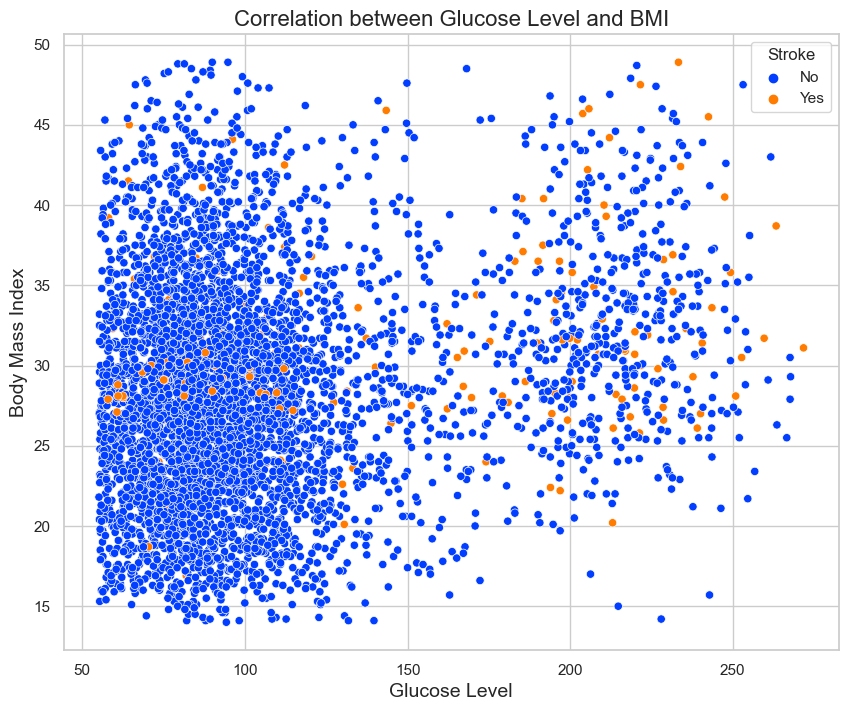

In [194]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create the scatterplot
scatterplot = sns.scatterplot(data=df, x="Glucose Level", y="Body Mass Index", hue="Stroke", palette="bright")

# Set labels and title
plt.xlabel("Glucose Level", fontsize=14)
plt.ylabel("Body Mass Index", fontsize=14)
plt.title("Correlation between Glucose Level and BMI", fontsize=16)

# Customize the legend
legend = scatterplot.get_legend()
legend.set_title("Stroke")

# Add a legend title for "Stroke"
scatterplot.get_legend().set_title("Stroke")
scatterplot.get_legend().get_texts()[0].set_text("No")
scatterplot.get_legend().get_texts()[1].set_text("Yes")

plt.show()

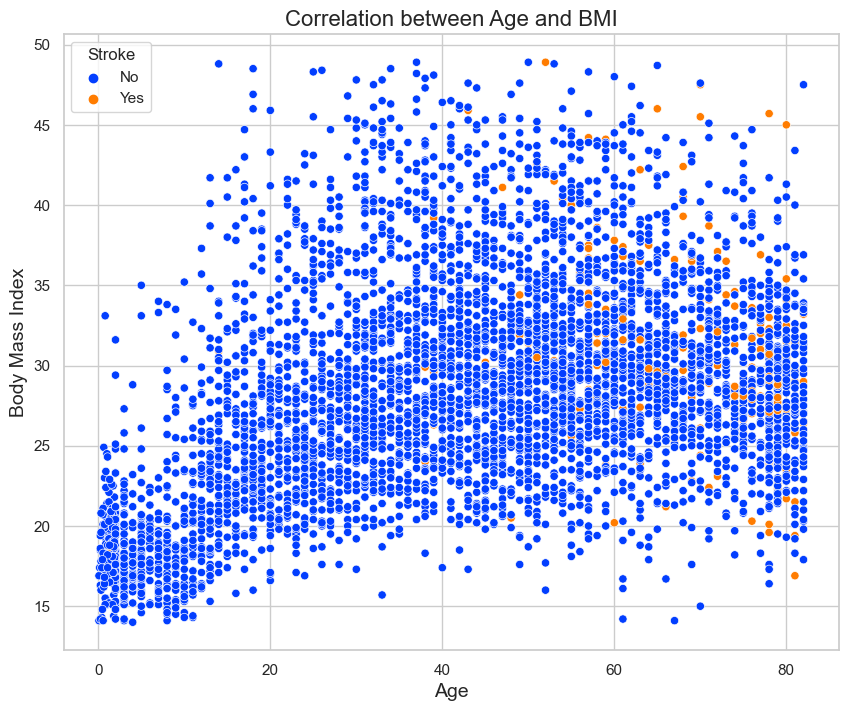

In [195]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create the scatterplot
scatterplot = sns.scatterplot(data=df, x="Age", y="Body Mass Index", hue="Stroke", palette="bright")

# Set labels and title
plt.xlabel("Age", fontsize=14)
plt.ylabel("Body Mass Index", fontsize=14)
plt.title("Correlation between Age and BMI", fontsize=16)

# Customize the legend
legend = scatterplot.get_legend()
legend.set_title("Stroke")

# Add a legend title for "Stroke"
scatterplot.get_legend().set_title("Stroke")
scatterplot.get_legend().get_texts()[0].set_text("No")
scatterplot.get_legend().get_texts()[1].set_text("Yes")

plt.show()

## Handling Imbalanced Data

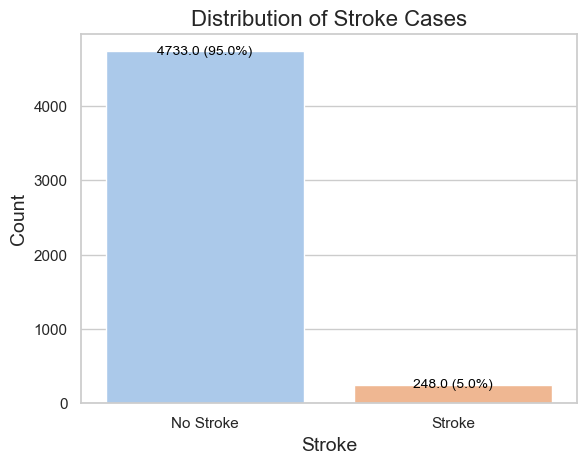

<Figure size 600x200 with 0 Axes>

In [196]:
# Set the style
sns.set(style="whitegrid")

# Create the count plot
countplot = sns.countplot(x="Stroke", data=df, palette="pastel")

# Customize the labels and title
plt.xlabel("Stroke", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Stroke Cases", fontsize=16)

# Set the figure size
plt.figure(figsize=(6, 2))

# Add annotations with the count on top of the bars
total = len(df["Stroke"])
for p in countplot.patches:
    count = p.get_height()
    percentage = 100 * count / total
    countplot.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black')

# Customize the x-axis tick labels
countplot.set_xticklabels(["No Stroke", "Stroke"])

plt.show()

In [197]:
df_stroke = pd.DataFrame(df)

In [198]:
# split the dataset into features (X) and target variable (y)
X = df_stroke.drop('Stroke',axis=1)
y = df_stroke['Stroke']

In [199]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [200]:
# Feature Scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [201]:
# apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state= 0)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state= 0)
# print the shape of the balanced dataset
print("Shape of balanced dataset:", X_res.shape, y_res.shape)

Shape of balanced dataset: (6606, 10) (6606,)


In [203]:
# Print the shape of training and testing data along with its labels.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5284, 10), (1322, 10), (5284,), (1322,))

### Classification (All Features)

In [204]:
def classification_all_features(Model):
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
  
    # Printing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

### Classification with Hyperparameter Tuning (all features)

In [205]:
def classification_tuning_all(regularizator, k=5):
    # Hyperparameter with regularizator
    model_cv = regularizator
    
    # Fitting classifier to the Training set (all features)
    model_cv.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model_cv.predict(X_test)

    global score 
    # Assign f1 score to a variable
    score = model_cv.score(X_test, y_test)

    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

    # Printing Tuned Model Parameters
    print("Tuned Model Parameters: {}".format(model_cv.best_params_))
    
    # Printing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))
    
    # Perform k-fold cross-validation and print the cross-validation scores
    cross_val_scores = cross_val_score(model_cv, X_train, y_train, cv=k, scoring='f1_macro')
    print(f"{k}-Fold Cross-Validation Scores: {cross_val_scores}")
    print(f"Average {k}-Fold Cross-Validation Score: {cross_val_scores.mean()}")

### Decision Tree

In [206]:
# Function for decision tree classification model with all features
classification_all_features(DecisionTreeClassifier(criterion = 'gini', random_state = 0))

f1 score: 0.9159960799913743
Accuracy: 0.916036308623298
[[592  71]
 [ 40 619]]


### Decision Tree (Cross Validation and Hyperparameter Tuning)

In [207]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Function for hyperparameter tuning to decision tree classification with all features
classification_tuning_all(RandomizedSearchCV(DecisionTreeClassifier(random_state = 0), 
                                             param_dist, cv=5, scoring = 'f1_weighted'))

f1 score: 0.9175323228825876
Tuned Model Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
Accuracy: 0.9175491679273827
[[598  65]
 [ 44 615]]
5-Fold Cross-Validation Scores: [0.87227821 0.87888944 0.8864686  0.90250414 0.86535595]
Average 5-Fold Cross-Validation Score: 0.8810992674486406


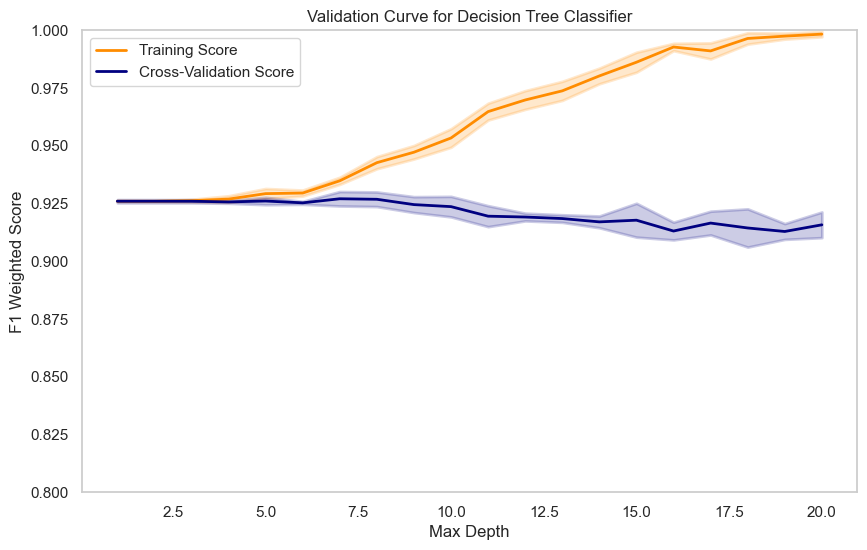

In [214]:
# Define a range of values for 'max_depth'
param_range = np.arange(1, 21)

# Create the DecisionTreeClassifier with tuned parameters
tuned_model = DecisionTreeClassifier(
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    criterion='entropy',
    random_state=0
)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    tuned_model, X, y, param_name='max_depth', param_range=param_range,
    cv=5, scoring='f1_weighted')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Decision Tree Classifier")
plt.xlabel("Max Depth")
plt.ylabel("F1 Weighted Score")
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

### Random Forest

In [161]:
# Function for Random Forest Classification model with all features
classification_all_features(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))

f1 score: 0.9358490566037736
Accuracy: 0.9358490566037736
[[510  34]
 [ 34 482]]


### Random Forest (Cross Validation and Hyperparameter Tuning)

In [162]:
random_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Function for hyperparameter tuning to random forest classification with all features
classification_tuning_all(RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 0), 
                                             param_distributions = random_grid, n_iter = 100, cv = 5, 
                                             verbose=2, random_state=0, n_jobs = -1, scoring = 'f1_weighted'))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
f1 score: 0.9386898890583553
Tuned Model Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Accuracy: 0.9386792452830188
[[504  40]
 [ 25 491]]
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
5-Fold Cross-Validation Scores: [0.945752   0.95989763 0.93863009 0.93731297 0.91970758]
Average 5-Fold Cross-Validation Score: 0.9402600533462333


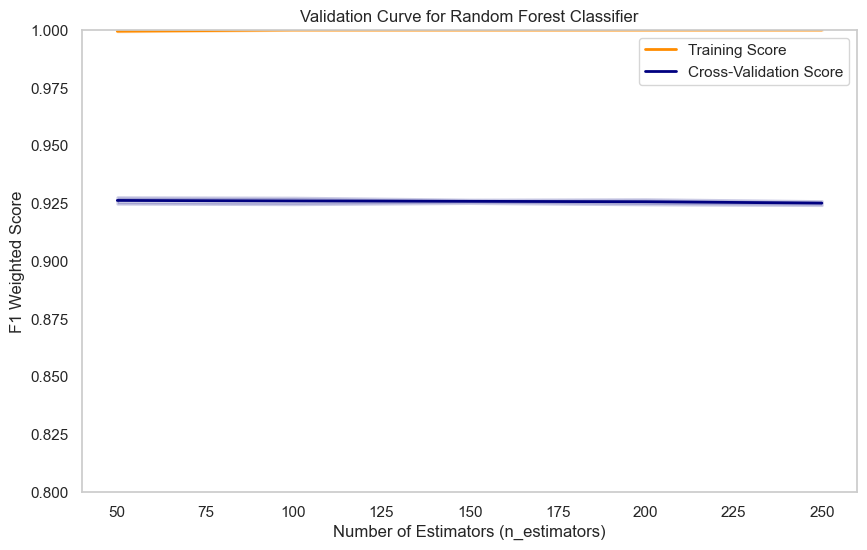

In [225]:
# Define a range of values for the 'n_estimators' hyperparameter
param_range = [50, 100, 150, 200, 250]  # Adjust as needed

# Create the RandomForestClassifier with tuned parameters
tuned_model = RandomForestClassifier(
    n_estimators=200,  # Adjust to your tuned value
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=0
)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    tuned_model, X, y, param_name='n_estimators', param_range=param_range,
    cv=5, scoring='f1_weighted', n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Random Forest Classifier")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("F1 Weighted Score")
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

### KNN

In [216]:
# Function for K-NN classification with all features
classification_all_features(KNeighborsClassifier())

f1 score: 0.8902585389134522
Accuracy: 0.8910741301059002
[[533 130]
 [ 14 645]]


### KNN (Cross Validation and Hyperparameter Tuning)

In [217]:
# Set up parameters
param_grid={
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Function for hyperparameter tuning to K-NN classification with all features
classification_tuning_all(GridSearchCV(KNeighborsClassifier(), 
                                       param_grid, cv = 5, scoring = 'f1_weighted'))

f1 score: 0.9348038209696218
Tuned Model Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9349470499243571
[[588  75]
 [ 11 648]]
5-Fold Cross-Validation Scores: [0.92303045 0.93547935 0.92981408 0.92114953 0.93733614]
Average 5-Fold Cross-Validation Score: 0.9293619109546676


In [223]:
# Define a range of values for 'n_neighbors'
param_range = np.arange(1, 21)

# Create the KNeighborsClassifier with tuned parameters
tuned_model = KNeighborsClassifier(
    n_neighbors=3,  # Adjust to your tuned value
    p=1,
    weights='distance'
)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    tuned_model, X, y, param_name='n_neighbors', param_range=param_range,
    cv=5, scoring='f1_weighted')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for KNN Classifier")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("F1 Weighted Score")
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

SyntaxError: invalid syntax (3055090500.py, line 19)

### Logistic Regression

In [218]:
# Function for logistic regression with all features
classification_all_features(LogisticRegression(random_state = 0))

f1 score: 0.7816045017255305
Accuracy: 0.7821482602118003
[[485 178]
 [110 549]]


### Logistic Regression (Cross Validation and Hyperparameter Tuning)

In [219]:
# Set up parameters
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Function for hyperparameter tuning to logistic regression with all features
classification_tuning_all(GridSearchCV(LogisticRegression(random_state = 0), 
                                       param_grid, cv=5, scoring = 'f1_weighted'))

f1 score: 0.7837587931572697
Tuned Model Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7844175491679274
[[483 180]
 [105 554]]
5-Fold Cross-Validation Scores: [0.78551907 0.79327465 0.78781948 0.79097303 0.78844158]
Average 5-Fold Cross-Validation Score: 0.7892055607926732


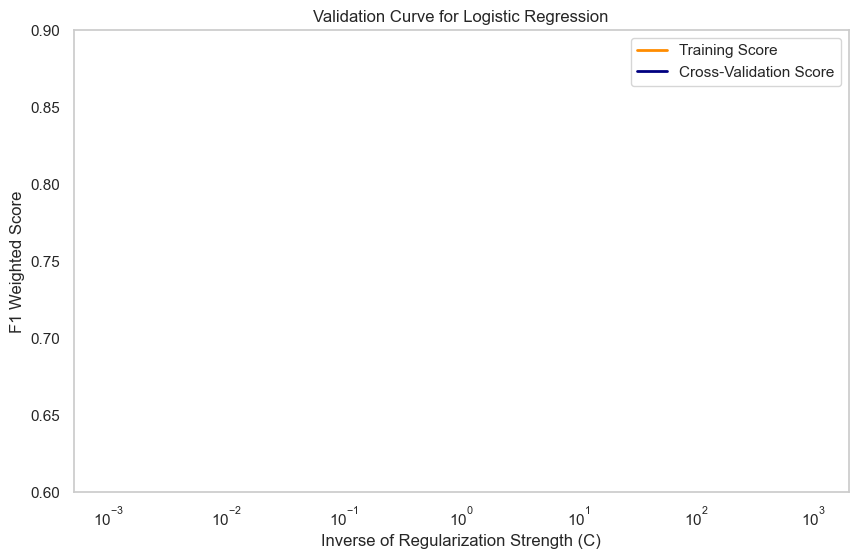

In [222]:
# Define a range of values for 'C'
param_range = np.logspace(-3, 3, 10)

# Create the LogisticRegression with tuned parameters
tuned_model = LogisticRegression(
    C=0.1,  # Adjust to your tuned value
    penalty='l2',
    solver='liblinear',
    random_state=0
)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    tuned_model, X, y, param_name='C', param_range=param_range,
    cv=5, scoring='f1_weighted')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Logistic Regression")
plt.xlabel("Inverse of Regularization Strength (C)")
plt.ylabel("F1 Weighted Score")
plt.xscale('log')
plt.ylim(0.6, 0.9)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

### SVM

In [220]:
# Function for SVM classifier with all features
classification_all_features(SVC(kernel = 'linear', random_state = 0))

f1 score: 0.7809452603855356
Accuracy: 0.7821482602118003
[[469 194]
 [ 94 565]]


### SVM (Cross Validation and Hyperparameter Tuning)

In [221]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

# Function for hyperparameter tuning to SVM classification with all features
classification_tuning_all(GridSearchCV(SVC(kernel='linear'), param_grid, 
                                       cv = 5, scoring = 'f1_weighted'))

f1 score: 0.7800048549626185
Tuned Model Parameters: {'C': 0.01, 'gamma': 0.001}
Accuracy: 0.7813918305597579
[[465 198]
 [ 91 568]]
5-Fold Cross-Validation Scores: [0.78608493 0.78406537 0.78926978 0.79431796 0.78889737]
Average 5-Fold Cross-Validation Score: 0.7885270833134668


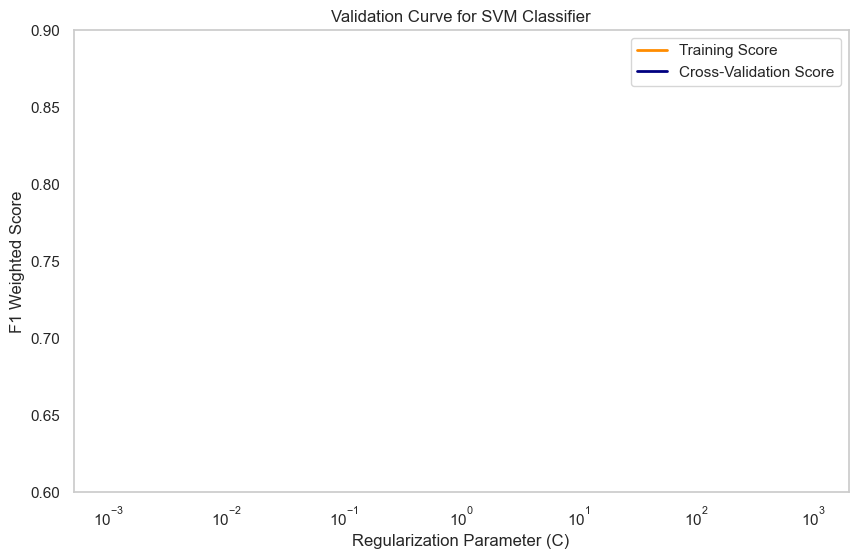

In [224]:
# Define a range of values for 'C'
param_range = np.logspace(-3, 3, 10)

# Create the SVC with tuned parameters
tuned_model = SVC(
    C=1.0,  # Adjust to your tuned value
    kernel='rbf',
    gamma='scale',
    random_state=0
)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    tuned_model, X, y, param_name='C', param_range=param_range,
    cv=5, scoring='f1_weighted')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for SVM Classifier")
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("F1 Weighted Score")
plt.xscale('log')
plt.ylim(0.6, 0.9)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()